In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('homeprices.csv')

In [6]:
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


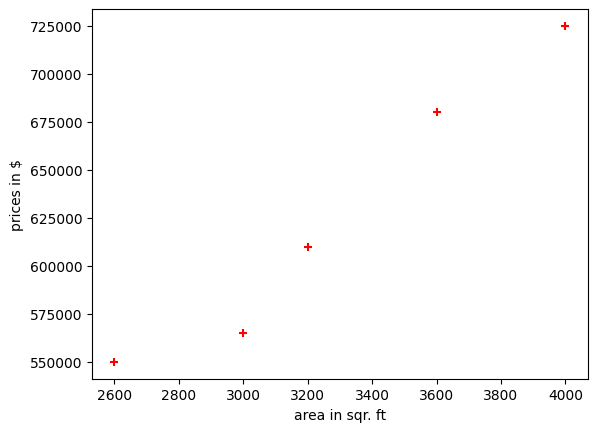

In [45]:
%matplotlib inline
plt.xlabel('area in sqr. ft')
plt.ylabel('prices in $')
plt.scatter(data.area, data.price, color='red', marker='+')
plt.show()

### Split the data

In [14]:
new_data = data.drop('price', axis='columns')
new_data

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [16]:
price = data.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [20]:
# Create linear regression object using Sci-Kit learn
reg = linear_model.LinearRegression()
reg.fit(new_data,price) # Started training the data 

LinearRegression()

### Predict the price of home with area

In [22]:
reg.predict([[3300]])

C:\Users\Saravanakumr.M\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [25]:
reg.predict([[5000]])

C:\Users\Saravanakumr.M\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

## $y = m * x + b$
### $m$ = slope (coef_)
### $x$ = area
### $b$ = y_intercept
### $y$ = dependent variable

In [24]:
reg.coef_ # m = 

array([135.78767123])

In [26]:
reg.intercept_

np.float64(180616.43835616432)

<h3 style="color:purple">Generate CSV file with price prediction</h3>

In [27]:
area_data = pd.read_csv('areas.csv')

In [31]:
area_data.head(3)

,area
0,1000
1,1500
2,2300


In [34]:
pred_prices = reg.predict(area_data)
pred_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [41]:
area_data['prices'] = pred_prices
area_data

,area,prices,prices1
0,1000,3.164041e+05,3.164041e+05
1,1500,3.842979e+05,3.842979e+05
2,2300,4.929281e+05,4.929281e+05
3,3540,6.613048e+05,6.613048e+05
4,4120,7.400616e+05,7.400616e+05
5,4560,7.998082e+05,7.998082e+05
6,5490,9.260908e+05,9.260908e+05
7,3460,6.504418e+05,6.504418e+05
8,4750,8.256079e+05,8.256079e+05
9,2300,4.929281e+05,4.929281e+05


In [42]:
area_data.to_csv("prediction_prices.csv")